# Reference:
- https://gist.github.com/zehsilva/18c28992796d9be99e16


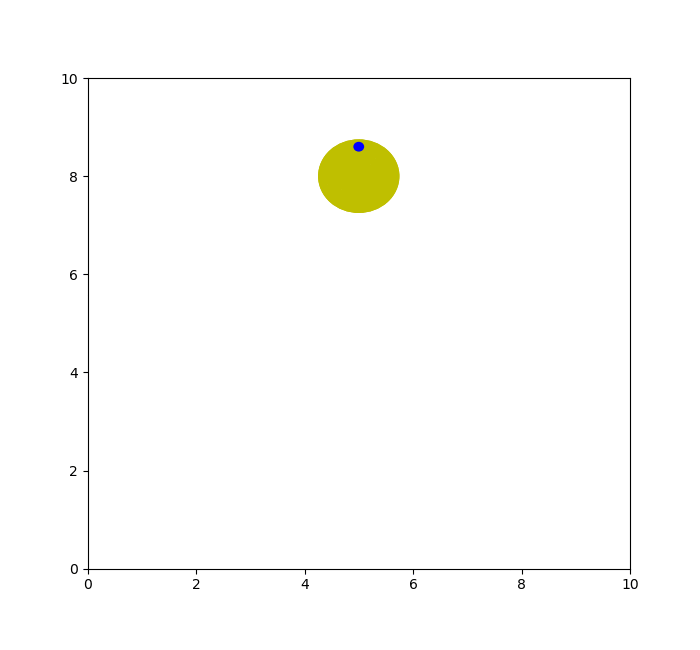

In [1]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import numpy as np
import base64

IMG_TAG = """<img src="data:image/gif;base64,{0}" alt="some_text">"""

def anim_to_gif(anim): 
    anim.save("output.gif", writer='imagemagick', fps=10);
    with open("output.gif", "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
        tag=IMG_TAG.format(encoded_string.decode('utf-8'))
    return tag

def display_animation(anim):
    plt.close(anim._fig)
    return HTML(anim_to_gif(anim))

fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, -5), 0.75, fc='y')
patch2 = plt.Circle((5, -5), 0.1, fc='b')
c= np.array([5,5])


def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    ax.add_patch(patch2)
    return patch,

def animate(i):
    x = 5 + 3 * np.sin(np.radians(i))
    y = 5 + 3 * np.cos(np.radians(i))
    patch.center = (x, y)
    patch2.center = (x-0.6*np.sin(np.radians(5*i)),y+0.6*np.cos(np.radians(5*i)))
    return patch2,

anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, frames=[5.8*x for x in range(62)], interval=1, blit=True)
display_animation(anim)